In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [5]:
dataset = load_wine(as_frame=True).frame


In [6]:
print(dataset.shape)

(178, 14)


eliminam din setul de date coloana target ( avand in vedere ca este set de date pentru clasificare )

In [7]:
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
dataset.drop('target', axis = 1, inplace = True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [10]:
dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


normalizarea datelor astfel incat toate coloanele sa fie in acelasi interval

In [12]:
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

In [14]:
pd.DataFrame(dataset).describe

<bound method NDFrame.describe of            0         1         2         3         4         5         6   \
0    1.518613 -0.562250  0.232053 -1.169593  1.913905  0.808997  1.034819   
1    0.246290 -0.499413 -0.827996 -2.490847  0.018145  0.568648  0.733629   
2    0.196879  0.021231  1.109334 -0.268738  0.088358  0.808997  1.215533   
3    1.691550 -0.346811  0.487926 -0.809251  0.930918  2.491446  1.466525   
4    0.295700  0.227694  1.840403  0.451946  1.281985  0.808997  0.663351   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.876275  2.974543  0.305159  0.301803 -0.332922 -0.985614 -1.424900   
174  0.493343  1.412609  0.414820  1.052516  0.158572 -0.793334 -1.284344   
175  0.332758  1.744744 -0.389355  0.151661  1.422412 -1.129824 -1.344582   
176  0.209232  0.227694  0.012732  0.151661  1.422412 -1.033684 -1.354622   
177  1.395086  1.583165  1.365208  1.502943 -0.262708 -0.392751 -1.274305   

           7         8         9         

testam initial cu k = 2 pentru Kmeans

In [15]:
k = 2

In [18]:
from sklearn.cluster import KMeans 
model = KMeans(n_clusters = k)

In [19]:
model.fit(dataset)

KMeans(n_clusters=2)

In [20]:
print(model.inertia_)

1975.0357389589437


Aplicam metoda Elbow pentru a determina numarul optim de 
clustere ->

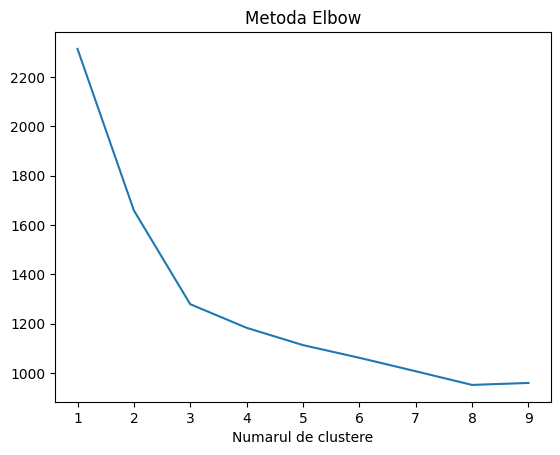

In [21]:
inertia = []
for i in range (1, 10):
    model = KMeans(n_clusters= i)
    model.fit(dataset)
    inertia.append(model.inertia_)
plt.plot(range(1,10), inertia)
plt.title("Metoda Elbow")
plt.xlabel("Numarul de clustere")
plt.show("Inertia")
plt.show()   

In [22]:
k = 3
model = KMeans(n_clusters= k )
model.fit(dataset)


KMeans(n_clusters=3)

In [23]:
predict = model.predict(dataset)

In [24]:
frame = pd.DataFrame(dataset)
frame['cluster'] = predict
frame['cluster'].value_counts()

cluster
1    66
0    61
2    51
Name: count, dtype: int64

verificam centroidele finale ale clusterelor

In [25]:
model.cluster_centers_

array([[ 0.87809728, -0.30457633,  0.31894179, -0.66452366,  0.56488825,
         0.87650546,  0.94363903, -0.58558981,  0.58178294,  0.16718842,
         0.48372814,  0.76705349,  1.15834713],
       [-0.93900326, -0.39196582, -0.43920097,  0.20898793, -0.46377382,
        -0.05334831,  0.06690377, -0.01982215,  0.06479192, -0.88207529,
         0.45298189,  0.28973833, -0.75602559],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

Aplicam Principal Component Alanysis (PCA) pentru reducerea dimensionalitatii de la 13 la 2 dimensiuni

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dataset_reduced = pd.DataFrame(data = pca.fit_transform(dataset), columns= ['Column 1', 'Column 2'])

In [38]:
centroids = pca.transform(model.cluster_centers_)

afisam grafic punctele si centroidele clusterelor

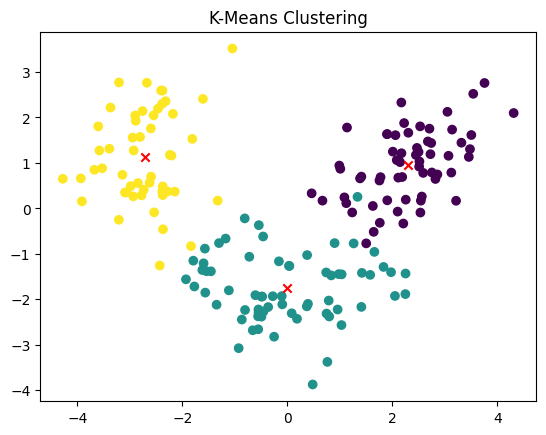

In [39]:
plt.scatter(dataset_reduced['Column 1'], dataset_reduced['Column 2'], c = model.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker= 'x', c = 'red' )
plt.title('K-Means Clustering')
plt.show()